In [1]:
# import required functions and classes
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sktime.datasets._data_io import _load_provided_dataset

DATA_PATH = os.path.join(os.getcwd(),"datasets","Univariate_ts")

In [2]:
def _load_data_set(data_set_name = "ArrowHead"):

    train_data = _load_provided_dataset(name=data_set_name,split="train", return_X_y=False, return_type=None, extract_path=DATA_PATH
                                )

    test_data = _load_provided_dataset(name=data_set_name,split="test", return_X_y=False, return_type=None, extract_path=DATA_PATH
                                )


    print(f"Data set train instances: {train_data.shape[0]}")
    print(f"Train targets: {train_data.iloc[:,1].value_counts().to_dict()}")
    train_instance_length = [train_data.iloc[instance, 0].shape[0] for instance in range(len(train_data))]
    print(f"Train instance lengths: {pd.DataFrame(train_instance_length).value_counts().to_dict()}\n")

    print(f"Data set test instances: {test_data.shape[0]}")
    print(f"Test targets: {test_data.iloc[:,1].value_counts().to_dict()}")
    test_instance_length = [test_data.iloc[instance, 0].shape[0] for instance in range(len(train_data))]
    print(f"Test instance lengths: {pd.DataFrame(test_instance_length).value_counts().to_dict()}")
    
    return train_data, test_data

In [3]:
def _visualize_instances_per_target(n_samples_per_class=5, data_set_name = "ArrowHead"):
    train_data, test_data = _load_data_set(data_set_name = data_set_name)

    classes = train_data['class_val'].unique()

    # Create subplots for each class
    fig, axes = plt.subplots(len(classes), 1, figsize=(12, 3 * len(classes)), sharex=True, sharey=True)

    for i, target_class in enumerate(classes):
        # Filter the data for the current class
        class_data = train_data[train_data['class_val'] == target_class]
        
        if len(class_data) < n_samples_per_class:
            print(f"\n ATTENTION:\n len(class_data)= {len(class_data)} < n_samples_per_class {n_samples_per_class}")
            # If there are fewer instances in the class than n_samples_per_class, adjust it
            n_samples_per_class = len(class_data)
        
        # Select n random samples from the target class
        class_samples = class_data.sample(n=n_samples_per_class)
        
        # Plot the selected time series on the corresponding subplot with the same color
        for idx, row in class_samples.iterrows():
            axes[i].plot(row['dim_0'], color='b', alpha=0.3)  # Use blue color with some transparency
        
        # Calculate and plot the average line for the class (bold line)
        average_line = class_samples['dim_0'].apply(lambda x: pd.Series(x)).mean(axis=0)
        axes[i].plot(average_line, color='r', linewidth=2, label='Average', alpha=0.9)  # Use red color for the average line
        
        # Add title and labels to each subplot
        axes[i].set_title(f'Target class: {target_class}')
        axes[i].set_xlabel('Time Step')
        axes[i].set_ylabel('Value')
        axes[i].legend(loc="upper right")
        axes[i].set_xlim(row['dim_0'].index.min(), row['dim_0'].index.max())

    # Adjust layout spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

Data set train instances: 36
Train targets: {'0': 12, '1': 12, '2': 12}
Train instance lengths: {(251,): 36}

Data set test instances: 175
Test targets: {'0': 69, '1': 53, '2': 53}
Test instance lengths: {(251,): 36}


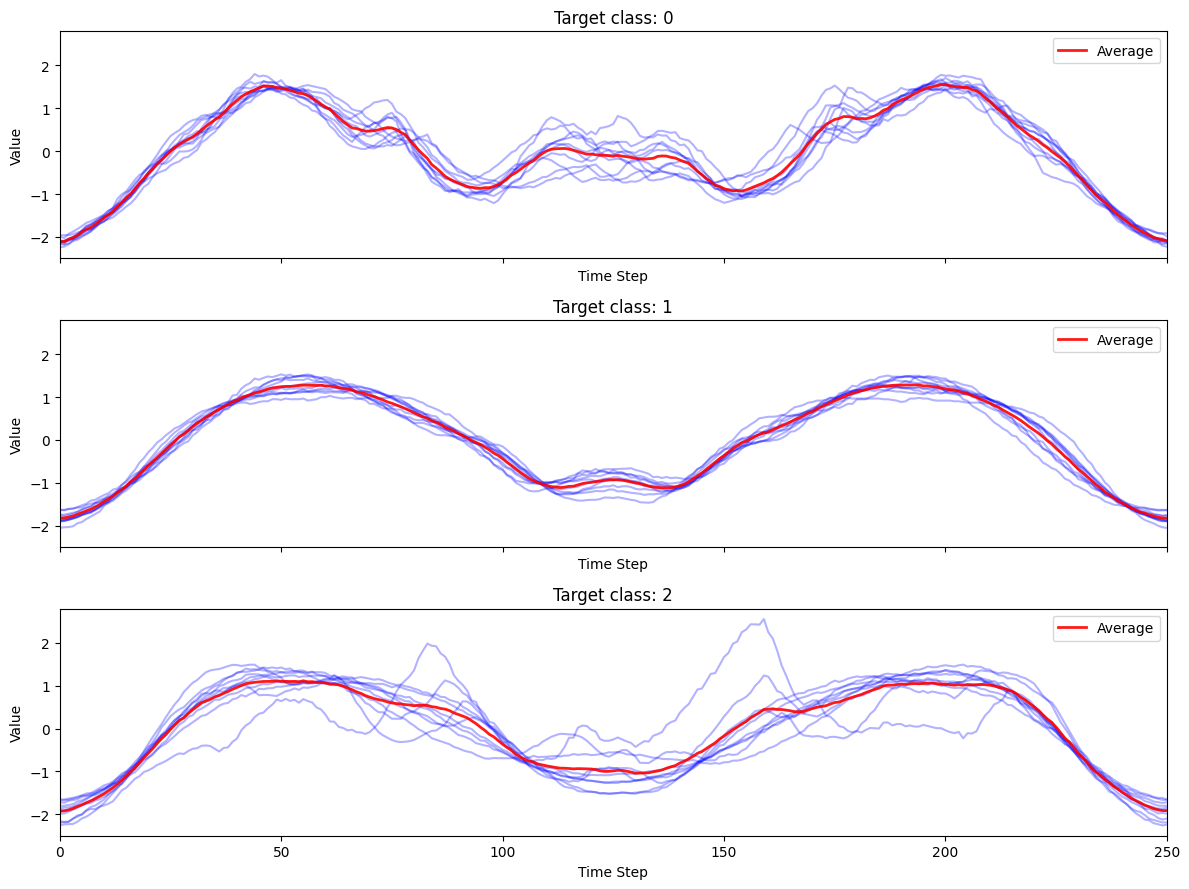

In [4]:
# Call the function with your desired parameters
_visualize_instances_per_target(data_set_name="ArrowHead", n_samples_per_class=10)

In [5]:
def _visualize_descriptives_targets(data_set_name = "ArrowHead", n_samples_per_class = 10):

    train_data, test_data = _load_data_set(data_set_name=data_set_name)

    classes = train_data['class_val'].unique()

    # Create subplots for each class
    fig, axes = plt.subplots(1,len(classes), figsize=(4 * len(classes), 4), sharex=False, sharey=True)

    # Initialize vmin and vmax to cover the entire range of statistics
    vmin = np.inf
    vmax = -np.inf

    for i, target_class in enumerate(classes):
        # Filter the data for the current class
        class_data = train_data[train_data['class_val'] == target_class]
        
        if len(class_data) < n_samples_per_class:
            print(f"\n ATTENTION:\n len(class_data)= {len(class_data)} < n_samples_per_class {n_samples_per_class}")
            # If there are fewer instances in the class than n_samples_per_class, adjust it
            n_samples_per_class = len(class_data)
        
        # Select n random samples from the target class
        class_samples = class_data.sample(n=n_samples_per_class)
        
        # Calculate statistical summary information for each time series
        statistics = class_samples['dim_0'].apply(lambda x: pd.Series(x).describe().drop(columns=["count"])).T
        statistics = statistics.T.drop(columns=["count"]).T
        
        # Update vmin and vmax based on the statistics
        current_vmin = statistics.values.min()
        current_vmax = statistics.values.max()
        
        if current_vmin < vmin:
            vmin = current_vmin
        if current_vmax > vmax:
            vmax = current_vmax
        
        # Create a heatmap to visualize the statistics
        sns.heatmap(statistics, ax=axes[i], cmap='coolwarm', annot=False, center=True, vmin=vmin, vmax=vmax, fmt=".2f")
        
        # Add title and labels to each subplot
        axes[i].set_title(f'Target class: {target_class}')
        axes[i].set_ylabel('Statistics')
        axes[i].set_xlabel('Time Series Index')

    # Adjust layout spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


Data set train instances: 36
Train targets: {'0': 12, '1': 12, '2': 12}
Train instance lengths: {(251,): 36}

Data set test instances: 175
Test targets: {'0': 69, '1': 53, '2': 53}
Test instance lengths: {(251,): 36}


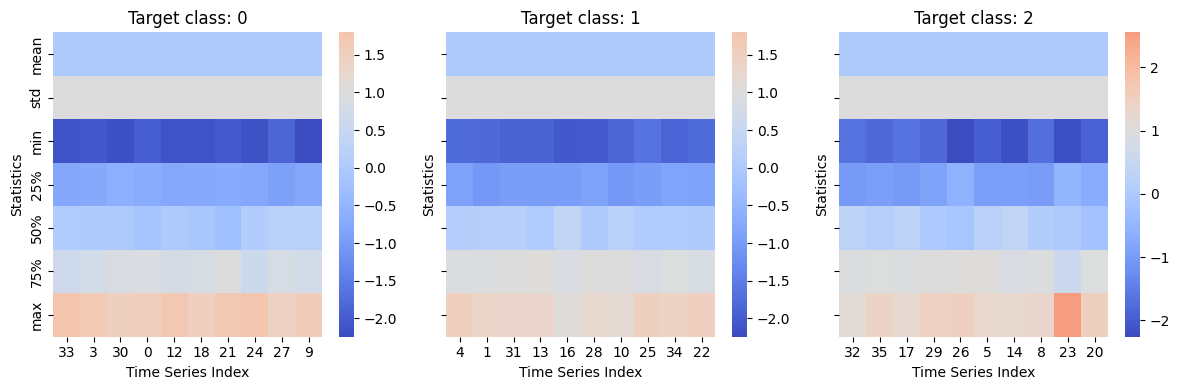

In [6]:
_visualize_descriptives_targets(data_set_name = "ArrowHead", n_samples_per_class = 10)